### Project: Preparing a dataset for modeling

Will Becerra

Data: Game of Thrones - Battle Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv('battles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

For this data set, I chose the outcome variable to be attacker_outcome, to be able to strategically choose when it was a good idea to attack and identify when the odds were against the attacking force.

I based my features on the categorical variable, battle_type ('ambush', 'pitched battle', 'razing', 'siege'), as well as the continuous variables - major_death, attacker_size, defender_size.

In [4]:
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
df.isnull().sum()/len(df)

name                  0.000000
year                  0.000000
battle_number         0.000000
attacker_king         0.052632
defender_king         0.078947
attacker_1            0.000000
attacker_2            0.736842
attacker_3            0.921053
attacker_4            0.947368
defender_1            0.026316
defender_2            0.947368
defender_3            1.000000
defender_4            1.000000
attacker_outcome      0.026316
battle_type           0.026316
major_death           0.026316
major_capture         0.026316
attacker_size         0.368421
defender_size         0.500000
attacker_commander    0.026316
defender_commander    0.263158
summer                0.026316
location              0.026316
region                0.000000
note                  0.868421
dtype: float64

In [6]:
df = df.dropna(subset=['attacker_size'])
df = df.dropna(subset=['defender_size'])

In [7]:
df

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
10,Battle of Torrhen's Square,299,11,Robb Stark,Balon/Euron Greyjoy,Stark,NaN,NaN,NaN,Greyjoy,...,0.0,0.0,244.0,900.0,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,1.0,Torrhen's Square,The North,Greyjoy's troop number comes from the 264 esti...
13,Sack of Winterfell,299,14,Joffrey/Tommen Baratheon,Robb Stark,Bolton,Greyjoy,NaN,NaN,Stark,...,1.0,0.0,618.0,2000.0,"Ramsay Snow, Theon Greyjoy","Rodrik Cassel, Cley Cerwyn, Leobald Tallhart",1.0,Winterfell,The North,Since House Bolton betrays the Starks for Hous...
14,Battle of Oxcross,299,15,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,6000.0,10000.0,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",1.0,Oxcross,The Westerlands,NaN
15,Siege of Storm's End,299,16,Stannis Baratheon,Renly Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,1.0,0.0,5000.0,20000.0,"Stannis Baratheon, Davos Seaworth","Renly Baratheon, Cortnay Penrose, Loras Tyrell...",1.0,Storm's End,The Stormlands,NaN
16,Battle of the Fords,299,17,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,0.0,20000.0,10000.0,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",1.0,Red Fork,The Riverlands,NaN


In [6]:
df = df[df.name != 'Siege of Winterfell']

In [25]:
df['ratio_armies'] = df['defender_size'] / df['attacker_size']

After eliminating a row with many NaNs, I created a new feature, ratio_armies, and converted the categorical variable, battle_type, into indicator variables.  I did the same for my target variable, attacker_outcome.

In [26]:
df = pd.concat([df, pd.get_dummies(df.battle_type)], axis=1)
df = pd.concat([df, pd.get_dummies(df.attacker_outcome)], axis=1)
df

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,pitched battle,razing,siege,loss,win,ambush,pitched battle,siege,loss,win
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1,0,0,0,1,0,1,0,0,1
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1,0,0,0,1,0,1,0,0,1
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1,0,0,1,0,0,1,0,1,0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0,0,0,0,1,1,0,0,0,1
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0,0,0,0,1,1,0,0,0,1
10,Battle of Torrhen's Square,299,11,Robb Stark,Balon/Euron Greyjoy,Stark,NaN,NaN,NaN,Greyjoy,...,1,0,0,0,1,0,1,0,0,1
13,Sack of Winterfell,299,14,Joffrey/Tommen Baratheon,Robb Stark,Bolton,Greyjoy,NaN,NaN,Stark,...,0,0,0,0,1,1,0,0,0,1
14,Battle of Oxcross,299,15,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0,0,0,0,1,1,0,0,0,1
15,Siege of Storm's End,299,16,Stannis Baratheon,Renly Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0,0,1,0,1,0,0,1,0,1
16,Battle of the Fords,299,17,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1,0,0,1,0,0,1,0,1,0


In [27]:
features = df[['name', 'win', 'loss', 'ambush', 'pitched battle', 'razing', 'siege', 'major_death', 'attacker_size', 'defender_size', 'ratio_armies']]

In [28]:
features.head()

,name,win,win,loss,loss,ambush,ambush,pitched battle,pitched battle,razing,siege,siege,major_death,attacker_size,defender_size,ratio_armies
0,Battle of the Golden Tooth,1,1,0,0,0,0,1,1,0,0,0,1.0,15000.0,4000.0,0.266667
2,Battle of Riverrun,1,1,0,0,0,0,1,1,0,0,0,0.0,15000.0,10000.0,0.666667
3,Battle of the Green Fork,0,0,1,1,0,0,1,1,0,0,0,1.0,18000.0,20000.0,1.111111
4,Battle of the Whispering Wood,1,1,0,0,1,1,0,0,0,0,0,1.0,1875.0,6000.0,3.200000
5,Battle of the Camps,1,1,0,0,1,1,0,0,0,0,0,0.0,6000.0,12625.0,2.104167


In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 30
Data columns (total 16 columns):
name              15 non-null object
win               15 non-null uint8
win               15 non-null uint8
loss              15 non-null uint8
loss              15 non-null uint8
ambush            15 non-null uint8
ambush            15 non-null uint8
pitched battle    15 non-null uint8
pitched battle    15 non-null uint8
razing            15 non-null uint8
siege             15 non-null uint8
siege             15 non-null uint8
major_death       15 non-null float64
attacker_size     15 non-null float64
defender_size     15 non-null float64
ratio_armies      15 non-null float64
dtypes: float64(4), object(1), uint8(11)
memory usage: 825.0+ bytes


In [30]:
features.describe()

,win,win,loss,loss,ambush,ambush,pitched battle,pitched battle,razing,siege,siege,major_death,attacker_size,defender_size,ratio_armies
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.733333,0.733333,0.266667,0.266667,0.400000,0.400000,0.466667,0.466667,0.0,0.133333,0.133333,0.666667,14455.800000,7187.666667,1.522809
std,0.457738,0.457738,0.457738,0.457738,0.507093,0.507093,0.516398,0.516398,0.0,0.351866,0.351866,0.487950,24804.830722,6588.206147,1.385152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,100.000000,0.012400
25%,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2687.500000,1620.000000,0.422619
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,6000.000000,6000.000000,1.000000
75%,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,16500.000000,10000.000000,2.652083
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,100000.000000,20000.000000,4.000000


Text(0.5,1,'Size of Attacking Army')

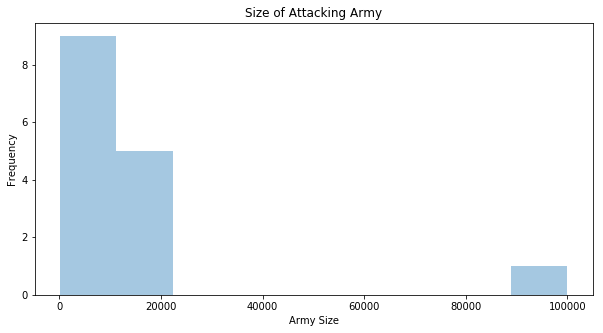

In [32]:
plt.figure(figsize=(10, 5))
sns.distplot(df.attacker_size, kde=False)
plt.xlabel('Army Size')
plt.ylabel('Frequency')
plt.title('Size of Attacking Army')

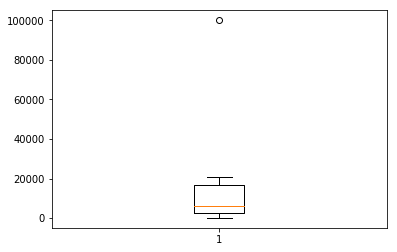

In [36]:
plt.boxplot(df.attacker_size)
plt.show()

Text(0.5,1,'Size of Defending Army')

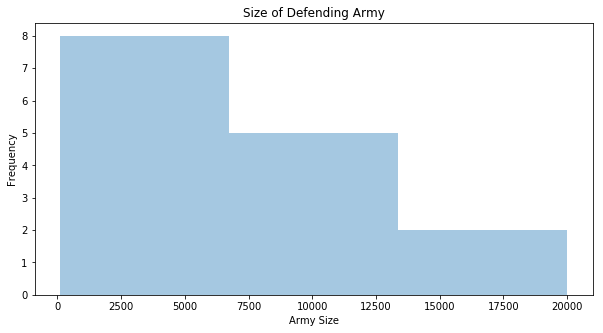

In [33]:
plt.figure(figsize=(10, 5))
sns.distplot(df.defender_size, kde=False)
plt.xlabel('Army Size')
plt.ylabel('Frequency')
plt.title('Size of Defending Army')

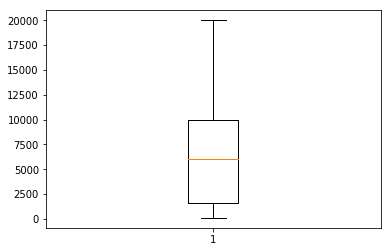

In [37]:
plt.boxplot(df.defender_size)
plt.show()

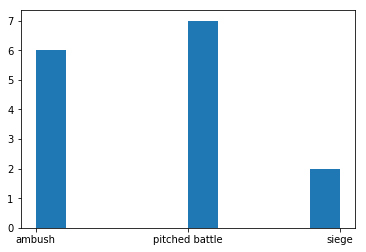

In [41]:
plt.hist(df.battle_type)
plt.show()

In [13]:
features.corr()

,win,loss,ambush,pitched battle,razing,siege,major_death,attacker_size,defender_size,ratio_armies
win,1.000000,-1.000000,0.240563,-0.343642,0.094491,0.084145,-0.371485,-0.578742,-0.282307,0.464427
loss,-1.000000,1.000000,-0.240563,0.343642,-0.094491,-0.084145,0.371485,0.578742,0.282307,-0.464427
ambush,0.240563,-0.240563,1.000000,-0.474808,-0.145479,-0.395847,0.316978,-0.294849,-0.184156,0.312218
pitched battle,-0.343642,0.343642,-0.474808,1.000000,-0.186501,-0.507469,0.009465,0.069784,0.137171,-0.403134
razing,0.094491,-0.094491,-0.145479,-0.186501,1.000000,-0.155486,-0.175933,NaN,NaN,NaN
siege,0.084145,-0.084145,-0.395847,-0.507469,-0.155486,1.000000,-0.230988,0.252015,0.057999,0.141686
major_death,-0.371485,0.371485,0.316978,0.009465,-0.175933,-0.230988,1.000000,0.267966,0.081815,0.064491
attacker_size,-0.578742,0.578742,-0.294849,0.069784,NaN,0.252015,0.267966,1.000000,-0.109572,-0.462324
defender_size,-0.282307,0.282307,-0.184156,0.137171,NaN,0.057999,0.081815,-0.109572,1.000000,0.227969
ratio_armies,0.464427,-0.464427,0.312218,-0.403134,NaN,0.141686,0.064491,-0.462324,0.227969,1.000000


After creating the new features and looking at the correlations, I found that ambushes were the most attractive form of attack and correlated highly with a winining outcome, and that I don't want to get into a pitched battle, where there was high correlation with a loss.  As can be imagined, the size of armies would also be a determinant in deciding whether to attack, so it would behoove me to send my spies ahead to determine the enemy army size.

Future analysis: For a future study, I would choose a larger data set, that would reduce the impact of eliminating some NaN rows and also allow for higher predictive power.